<img src="https://heig-vd.ch/docs/default-source/doc-global-newsletter/2020-slim.svg" alt="Logo HEIG-VD" style="width: 80px;" align="right"/>

# Cours APN - Labo 5 : Cartes auto-organisatrices (SOM) de Kohonen

## Résumé

Le but de ce laboratoire est de réaliser une expérience de groupement avec des cartes auto-organisatrices.  Le code vous est fourni, y compris les deux librairies `kohonen.py` et `KohonenUtils.py`.  On vous demande de trouver une bonne paramétrisation de la carte, et d'expliquer brièvement quelques éléments de code.

In [246]:
import KohonenUtils
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Données

On considère une liste de 16 animaux, décrits à l'aide de 13 attributs booléens.  Les données sont fournies dans cette section.  Veuillez exécuter les cellules, inspecter les données, et répondre à la question finale.

In [247]:
matrix = np.array([[1,0,0,1,0,0,0,0,1,0,0,1,0],
                   [1,0,0,1,0,0,0,0,1,0,0,0,0],
                   [1,0,0,1,0,0,0,0,1,0,0,0,1],
                   [1,0,0,1,0,0,0,1,1,0,0,1,1],
                   [1,0,0,1,0,0,0,0,1,1,0,1,0],
                   [1,0,0,1,0,0,0,0,1,1,0,1,0],
                   [0,1,0,1,0,0,0,0,1,1,0,1,0],
                   [0,1,0,0,1,1,0,0,0,1,0,0,0],
                   [0,1,0,0,1,1,0,0,0,0,1,0,0],
                   [0,1,0,0,1,1,0,1,0,1,1,0,0],
                   [1,0,0,0,1,1,0,0,0,1,0,0,0],
                   [0,0,1,0,1,1,0,0,0,1,1,0,0],
                   [0,0,1,0,1,1,0,1,0,1,1,0,0],
                   [0,0,1,0,1,1,1,1,0,0,1,0,0],
                   [0,0,1,0,1,1,1,1,0,0,1,0,0],
                   [0,0,1,0,1,1,1,0,0,0,0,0,0]])

In [248]:
animals = pd.DataFrame(matrix.astype(float),columns=['small', 'medium', 'big', '2legs', '4legs', 'hair', 'hooves',
                                'mane', 'feathers', 'hunt', 'run', 'fly', 'swim'])

animals.index = ['dove', 'hen', 'duck', 'goose', 'owl', 'hawk', 'eagle', 'fox',
                 'dog', 'wolf', 'cat', 'tiger', 'lion', 'horse', 'zebra', 'cow']

display(animals)

,small,medium,big,2legs,4legs,hair,hooves,mane,feathers,hunt,run,fly,swim
dove,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
hen,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
duck,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
goose,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
owl,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
hawk,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
eagle,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
fox,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
dog,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
wolf,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


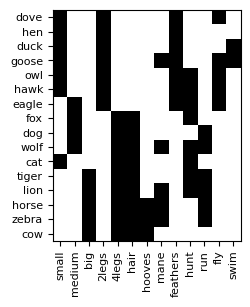

In [249]:
plt.figure(figsize=(3,3))
plt.xticks(np.arange(matrix.shape[1]), animals.columns, rotation=90, fontsize=8)
plt.yticks(np.arange(matrix.shape[0]), animals.index, fontsize=8)
plt.imshow(matrix, cmap='binary')

**Question 1a :** pouvez-vous identifier visuellement des groupes d'animaux ?

**Réponse**: On peut remarquer p.ex le groupe des oiseaux (plutôt petit et à deux pattes, sauf pour l'aigle) et celui des mammifères (poils et 4 pattes). 

## 2. Entraînement d'une carte de Kohonen

Le code fourni ci-dessous crée une carte auto-organisatrice, l'entraîne, et affiche le résultat final sous la forme d'une matrice-U.  Veuillez répondre aux questions qui suivent.

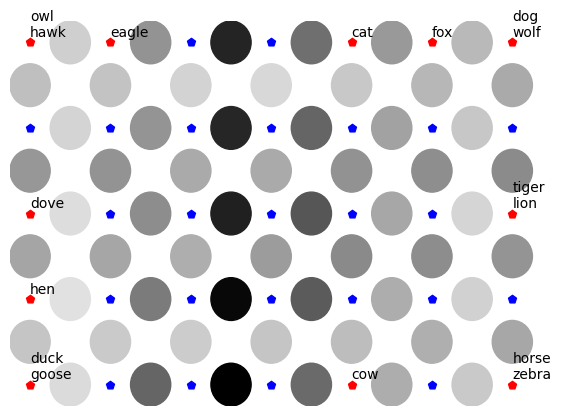

In [250]:
kmap = KohonenUtils.KohonenMap(5, 7, size_vector=len(animals.columns)) # initialiser la SOM

n_iter = 10

learning_rate = KohonenUtils.ExponentialTimeseries(1, 0.2, n_iter * len(animals.index))

neighborhood_size = KohonenUtils.ExponentialTimeseries(4./3 * len(animals.index), 1, n_iter * len(animals.index))

kmap.train(animals.values, np.array(animals.index), n_iter, learning_rate, neighborhood_size) # entraîner la SOM

kmap.plot_umatrix(plot_names=True, plot_empty=True, fontsize=10) # afficher le résultat

**Question 2a :** veuillez expliquer brièvement, avec vos propres mots, ce que représente la matrice U, en répondant aux questions suivantes :
- que représentent les trois paramètres du constructeur `KohonenMap` ?
- que représentent les points bleus ?
- que représentent les points rouges ?
- que représentent les points gris et les niveaux de gris ?
- pour une carte de taille _m_ * _n_, combien y a-t-il de points gris ?

**Réponses**:
* Les deux premiers correspondent à la taille horizontale et verticale de la carte, `size_vector`
donne la taille du vecteur d'entrée
* Des sommets de la carte vides, ne correpondant pas avec une des données d'entrée
* Des sommets de la carte correspondant avec une des données d'entrée
* Les arêtes entre les sommets, avec un(e) longueur/distance/poids plus faible si la couleur est claire, plus grande si c'est plus foncé.
* Le nombre d'arête d'un graphe grille de $m \cdot n$ sommets, soit $2\cdot m \cdot n - m - n$ points gris.


**Question 2b :** veuillez régler les paramètres du constructeur `KohonenMap` et le `n_iter` de façon à aboutir à une carte de Kohonen qui regroupe les seize animaux d'une manière qui vous semble cohérente.   Veuillez indiquer ci-dessous les paramètres choisis, lister les groupes observés d'animaux, et commenter le résultat.

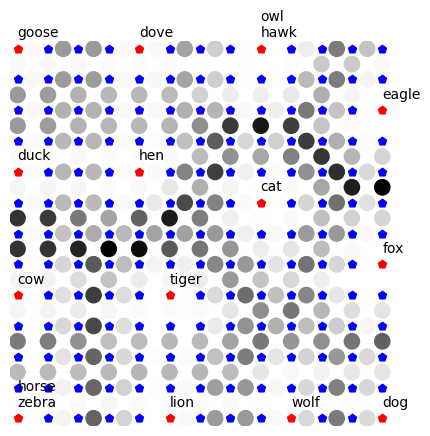

In [251]:
kmap = KohonenUtils.KohonenMap(13, 13, size_vector=len(animals.columns))
n_iter = 500
learning_rate = KohonenUtils.ExponentialTimeseries(1, 0.2, n_iter * len(animals.index))
neighborhood_size = KohonenUtils.ExponentialTimeseries(4./3 * len(animals.index), 1, n_iter * len(animals.index))
kmap.train(animals.values, np.array(animals.index), n_iter, learning_rate, neighborhood_size)
kmap.plot_umatrix(plot_names=True, plot_empty=True, fontsize=10)

**Réponse**: Si notre but principal est de différencier les oiseaux et les mammifères, on pourrait se contenter d'une carte de taille 1x2 ou 2x2.
Si cependant on aimerait obtenir plus de groupements intéressants directements sur les unités, une taille de 2x3 avec un nombre d'itérations de 500 permet d'obtenir les groupes suivants:

* Rapaces : owl, hawk et eagle
* Autres oiseaux : dove, hen, duck et goose
* Canidés et félinés: fox, dog, wolf et cat (ce dernier constitue souvent son propre sommet selon les entraînements)
* Autres grands mammifères: tiger, lion, horse, zebra et cow

On peut également essayer d'observer un motif dans les frontières entre les unités, avec un carte de plus grande taille, p.ex 13x13 ce qui est affiché ci-dessus. Voir la question ci-dessous pour la répartition de ces groupes.

**Question 2c :** veuillez afficher une image de la matrice-U, au format PNG ou JPG, sur laquelle vous aurez dessiné les frontières visibles (à la main, avec un logiciel d'édition de votre choix).  Veillez à sauvegarder le notebook avec l'image avant l'envoi sur Cyberlearn.

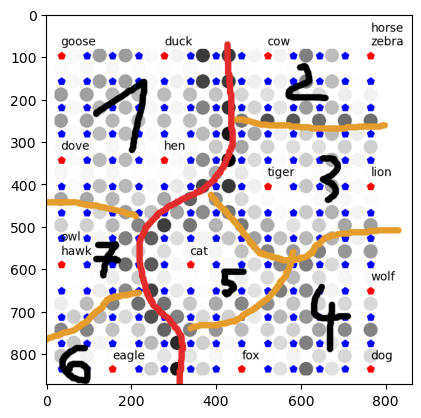

In [252]:
# Pour afficher votre image ici :
plt.imshow(mpimg.imread('matrice-u.png'))

On peut voir:
1. Les oiseaux non-rapaces
2. les grand mammifères
3. Les grands félins
4. Les canidés
5. Le chat (petits félins)
6. Rapace 1
7. Rapace 2

En gardant à l'esprit que cette séparation (surtout les frontières oranges) est arbitraire, les motifs trouvés sont assez intéressant.

## 3. Analyse des paramètres de l'entraînement

Dans cette section, le but est de comprendre les paramètres `learning_rate` et `neighborhood_size`.  Veuillez ré-exécuter les commandes ci-dessous qui les ré-initialisent.  On vous encourage à faire différents essais avant de répondre.

In [253]:
kmap = KohonenUtils.KohonenMap(13, 13, size_vector=len(animals.columns))
n_iter = 200

start: 1
end: 0.2
n_iter: 3200


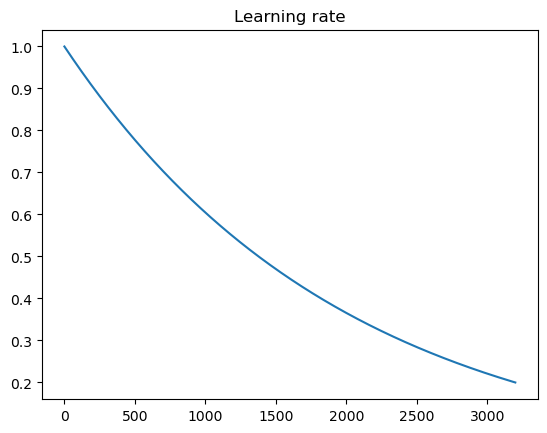

In [254]:
start = 1
end = 0.2
lr_iter = n_iter * len(animals.index)

learning_rate = KohonenUtils.ExponentialTimeseries(start, end, lr_iter)

print(f"start: {start}")
print(f"end: {end}")
print(f"n_iter: {lr_iter}")

plt.plot(learning_rate)
plt.title("Learning rate")
plt.show()

start: 21.333333333333332
end: 1
n_iter: 3200


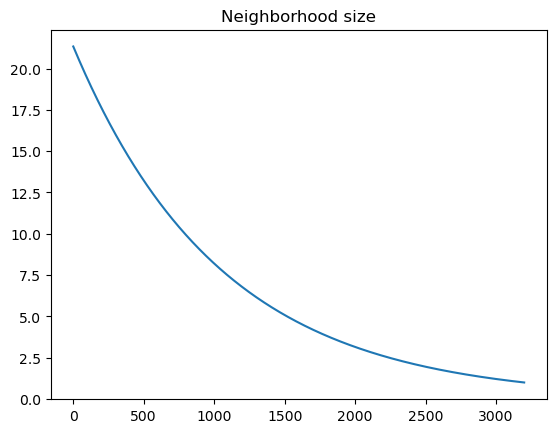

In [255]:
start = (4 / 3) * len(animals.index)
end = 1
ns_iter = n_iter * len(animals.index)

neighborhood_size = KohonenUtils.ExponentialTimeseries(start, end, ns_iter)

print(f"start: {start}")
print(f"end: {end}")
print(f"n_iter: {ns_iter}")

plt.plot(neighborhood_size)
plt.title("Neighborhood size")
plt.show()

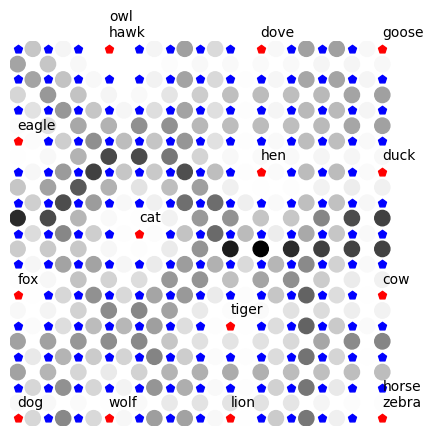

In [256]:
kmap.train(animals.values, np.array(animals.index), n_iter, learning_rate, neighborhood_size)
kmap.plot_umatrix(plot_names=True, plot_empty=True, fontsize=10)

**Question 3a :** veuillez expliquer avec vos propres mots le fonctionnement de `learning_rate` en répondant aux questions suivantes :
- quel est le type de `learning_rate` ?
- quelles sont les significations de ses trois paramètres ?
- pourquoi la valeur du troisième paramètre est-elle choisie ainsi ?
- comme fonctionne la `learning_rate` ?

**Réponse**: 
* C'est une `ExponentialTimeseries`
* La valeur de départ, celle de fin et le le nombre d'itérations entre les deux. Cela va permettre de générer une suite de nombres décroissants de façon non-linéaire.
* À chaque itération, on travaille une fois pour chaque élément des données et on veut diminuer le _learning rate_ à chaque fois. Il nous faut donc `n_iter * n_data` valeurs.
* Il pondère la mise à jour des poids, on le diminue donc dans le temps pour "affiner" le plus possible la valeur de ces derniers. 

**Question 3b :** veuillez afficher d'une façon convenable la ou les valeur(s) de la `learning_rate`.

**Réponse**: Voir le graphique _Learning rate_ situé plus haut pour observer l'évolution des valeurs au fil des itérations.

On pose maintenant les mêmes questions pour `neighborhood_size`.  <br/> Si les réponses sont similaires, vous pouvez copier/coller les réponses précédentes.

**Question 3c :** veuillez expliquer avec vos propres mots le fonctionnement de `neighborhood_size` en répondant aux questions suivantes :
- quel est le type de `neighborhood_size` ?
- quelles sont les significations de ses trois paramètres ?
- comme fonctionne la `neighborhood_size` ?

**Réponse**: 
* C'est une `ExponentialTimeseries`
* La valeur de départ, celle de fin et le le nombre d'itérations entre les deux. Cela va permettre de générer une suite de nombres décroissants de façon non-linéaire.
* Il permet de définir le nombre de neurones voisins du neurone gagnant dont les poids vont être également renforcés. Encore une fois cette valeur diminue pour affiner les valeurs au cours de l'entraînement.

**Question 3d :** veuillez afficher d'une façon convenable la ou les valeur(s) de la `neighborhood_size`.

**Réponse**: Voir le graphique _Neighborhood size_ situé plus haut pour observer l'évolution des valeurs au fil des itérations.

**Fin du Labo 5.**  Veuillez nettoyer ce notebook, afficher les résultats et les commentaires demandés, l'enregistrer, et le soumettre comme devoir sur Cyberlearn.